In [1]:
# Google BQ connector
from google.cloud import bigquery

# Data processing libraries
import pandas as pd
import numpy as np

# Data visualisation tools
import matplotlib.pyplot as plt
from IPython.display import clear_output

# scikit learn
from sklearn.cluster import KMeans, DBSCAN

# pickle
import pickle

# IPython display
from IPython.display import clear_output

In [2]:
# creating a BQ client
bqclient = bigquery.Client()

In [17]:
query = """
SELECT
  MIN(pingtimestamp) as min_timestamp,
  MAX(pingtimestamp) as max_timestamp,
  MAX(pingtimestamp) - MIN(pingtimestamp) as diff_timestamp,
  trj_id as trip_id
FROM
  `jjkoh95.jjkoh.grab_raw_singapore`
GROUP BY
  trj_id
ORDER BY
  diff_timestamp DESC
"""

In [18]:
df = bqclient.query(query).result().to_dataframe()

In [19]:
df.head()

,min_timestamp,max_timestamp,diff_timestamp,trip_id
0,1555838486,1555854891,16405,78371
1,1555867007,1555873966,6959,77844
2,1555586062,1555592586,6524,65738
3,1555576202,1555581114,4912,72549
4,1555581666,1555585755,4089,79794


In [20]:
df.diff_timestamp.describe()

count    28000.000000
mean      1251.591714
std        343.750792
min        651.000000
25%       1034.000000
50%       1181.000000
75%       1375.000000
max      16405.000000
Name: diff_timestamp, dtype: float64

In [26]:
sum(df.diff_timestamp > 3600)

18

In [7]:
query = """
SELECT
  *
FROM
  `jjkoh95.jjkoh.grab_raw_singapore`
WHERE
  trj_id='78371'
ORDER BY
  pingtimestamp
"""

In [8]:
df = bqclient.query(query).result().to_dataframe()

In [13]:
df.head()

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy
0,78371,car,android,1555838486,1.345677,103.732072,6.504030,147,3.9
1,78371,car,android,1555838487,1.345633,103.732117,5.781360,143,3.9
2,78371,car,android,1555838488,1.345593,103.732160,5.645988,139,3.9
3,78371,car,android,1555838489,1.345557,103.732203,5.262520,136,3.9
4,78371,car,android,1555838490,1.345517,103.732245,5.404069,139,3.9


In [12]:
np.min(df.pingtimestamp), np.max(df.pingtimestamp)

(1555838486, 1555854891)

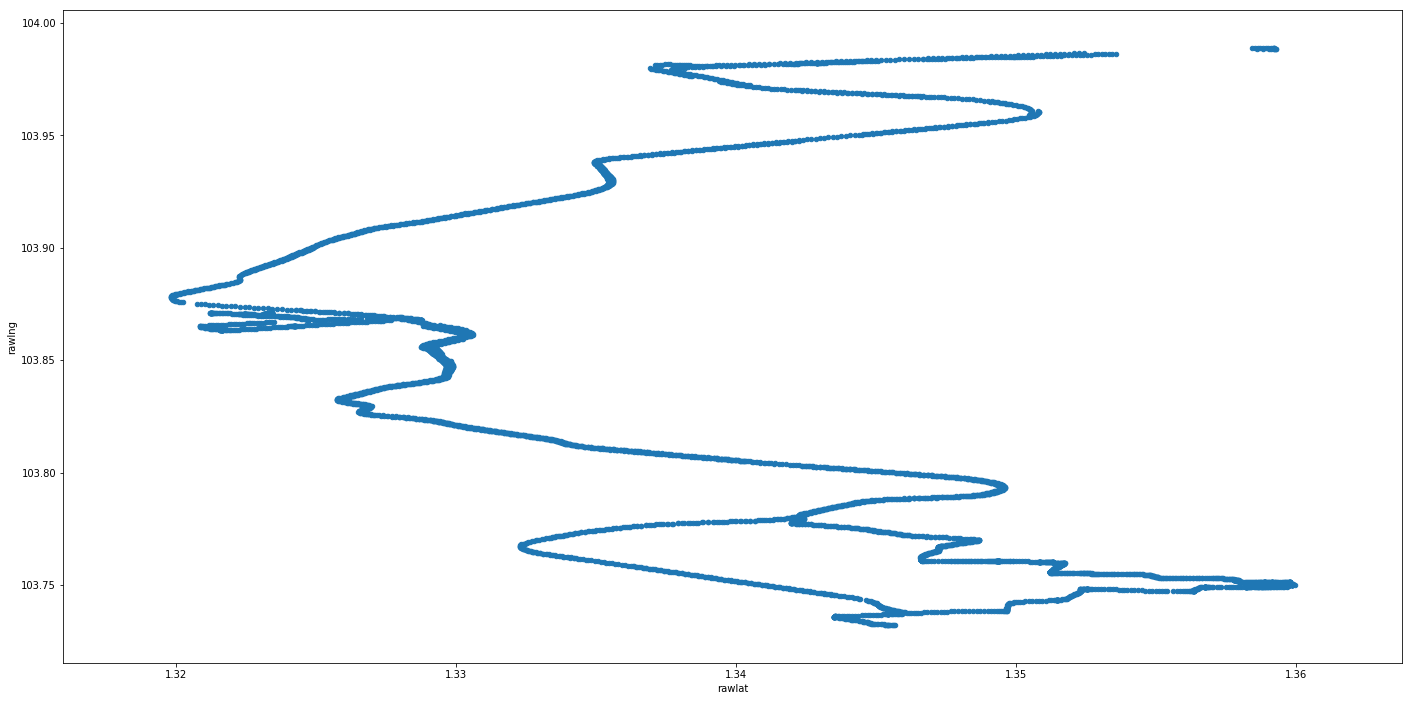

In [16]:
df.plot.scatter(x="rawlat", y="rawlng", figsize=(24, 12))